In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("aggregate_results.tsv", sep="\t", header=None, index_col=0).T
df.head()

,Human,DGPT-Gab-MC
1,4.25,3.33
2,2.50,3.83
3,3.00,3.92
4,3.17,3.75
5,3.67,3.42


In [3]:
# create a new dataframe with a Ratings columnn and a System column from df

df_human = df[["Human"]]
df_human["System"] = "Human"
df_human = df_human.rename(columns={"Human": "Rating"})

df_dgpt_gab_mc = df[["DGPT-Gab-MC"]]
df_dgpt_gab_mc["System"] = "DGPT-Gab-MC"
df_dgpt_gab_mc = df_dgpt_gab_mc.rename(columns={"DGPT-Gab-MC": "Rating"})

# concatenate the two dataframes on top of each other with unique index
df_concat = pd.concat([df_human, df_dgpt_gab_mc], ignore_index=True)
ratings = df_concat
ratings.head()

,Rating,System
0,4.25,Human
1,2.50,Human
2,3.00,Human
3,3.17,Human
4,3.67,Human


In [4]:
BINWIDTH = 0.5
XMIN = 1
XMAX = 5

Notice the Human responses tail to the right, while the System responses tail to the left. The system responses are concentrated between 3 and 4, because the responses are generic and repetitive (but safe). The human responses are more variable and spread out due to more unpredictability, with a tail to the right due to some extremely high-quality responses. The system responses tail to the left, due to occasional extremely poor responses.

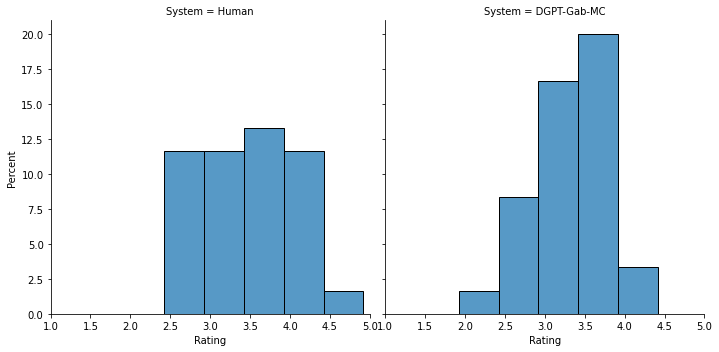

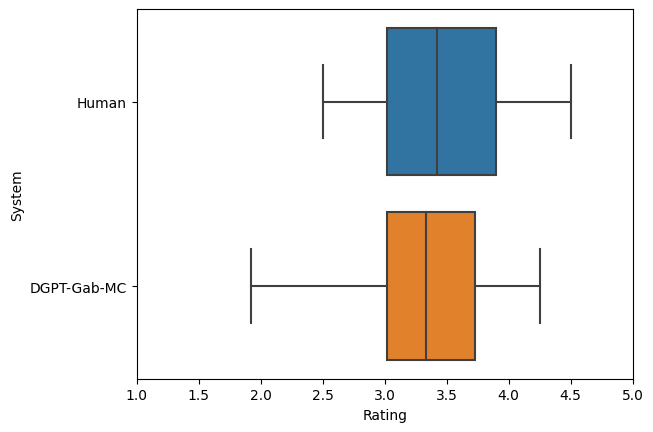

In [5]:
sns.displot(ratings, x="Rating", col="System", stat="percent", binwidth=BINWIDTH)
plt.xlim(XMIN, XMAX)

WHIS=2
plt.figure()
sns.boxplot(x="Rating", y="System", data=ratings, orient="h", whis=WHIS)
plt.xlim(XMIN, XMAX);